In [2]:
# imports 

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yt
import datetime as dt

In [13]:
# get our data from yfinance

ticker_symbol = "NFLX"

# ticker object
ticker = yt.Ticker(ticker_symbol)

# fetch historical data
data = ticker.history(period="10y")

print(data.head())

                                 Open        High        Low       Close  \
Date                                                                       
2015-10-19 00:00:00-04:00   98.070000  103.620003  96.260002  101.690002   
2015-10-20 00:00:00-04:00  101.059998  102.110001  97.580002   98.989998   
2015-10-21 00:00:00-04:00   99.669998  100.339996  97.010002   97.959999   
2015-10-22 00:00:00-04:00   98.070000   99.930000  96.860001   97.320000   
2015-10-23 00:00:00-04:00   97.610001  101.559998  97.269997  100.040001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2015-10-19 00:00:00-04:00  29964700        0.0           0.0  
2015-10-20 00:00:00-04:00  17345600        0.0           0.0  
2015-10-21 00:00:00-04:00  13728500        0.0           0.0  
2015-10-22 00:00:00-04:00  12786800        0.0           0.0  
2015-10-23 00:00:00-04:00  18019900        0.0           0.0  


In [65]:
# Export as csv
data.to_csv("NFLX_data.csv")
df = pd.read_csv("NFLX_data.csv")

In [66]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2515 non-null   object 
 1   Open          2515 non-null   float64
 2   High          2515 non-null   float64
 3   Low           2515 non-null   float64
 4   Close         2515 non-null   float64
 5   Volume        2515 non-null   int64  
 6   Dividends     2515 non-null   float64
 7   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 157.3+ KB


In [67]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.0,2515.0
mean,416.940083,422.860604,410.919137,417.095872,7.671179e+06,0.0,0.0
std,270.520856,273.467771,267.462246,270.683466,6.493964e+06,0.0,0.0
min,80.570000,84.699997,79.949997,82.790001,1.144000e+06,0.0,0.0
25%,218.500000,223.995003,212.995003,218.305000,3.838500e+06,0.0,0.0
50%,359.769989,365.540009,354.309998,360.350006,5.809300e+06,0.0,0.0
75%,521.910004,532.304993,515.855011,524.235016,9.232250e+06,0.0,0.0
max,1338.229980,1341.150024,1321.209961,1339.130005,1.333875e+08,0.0,0.0


In [68]:
# set date as datetime obj and index
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ebina\AppData\Local\Temp\ipykernel_78760\3007228355.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [69]:
df.set_index('Date', inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 2015-10-19 00:00:00-04:00 to 2025-10-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2+ KB


In [71]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.0,2515.0
mean,416.940083,422.860604,410.919137,417.095872,7.671179e+06,0.0,0.0
std,270.520856,273.467771,267.462246,270.683466,6.493964e+06,0.0,0.0
min,80.570000,84.699997,79.949997,82.790001,1.144000e+06,0.0,0.0
25%,218.500000,223.995003,212.995003,218.305000,3.838500e+06,0.0,0.0
50%,359.769989,365.540009,354.309998,360.350006,5.809300e+06,0.0,0.0
75%,521.910004,532.304993,515.855011,524.235016,9.232250e+06,0.0,0.0
max,1338.229980,1341.150024,1321.209961,1339.130005,1.333875e+08,0.0,0.0


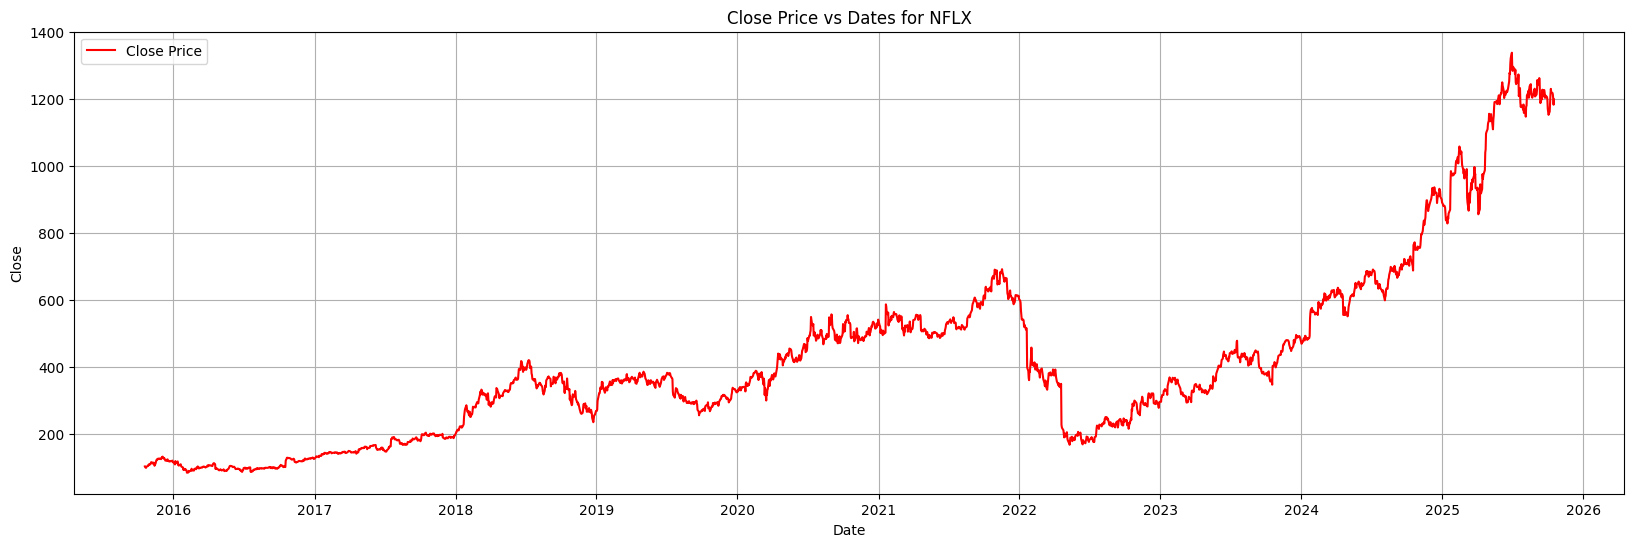

In [81]:
# visualizing the data
plt.figure(figsize=(20,6))
sns.lineplot(x=df.index, y=df['Close'], label='Close Price', color='red')
plt.grid()
plt.title('Close Price vs Dates for NFLX')
plt.show()

In [82]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [83]:
# mean, std and max of dividends, stock splits is 0 so I'll drop them
df = df.drop(['Dividends', 'Stock Splits'], axis=1)

In [84]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-19 00:00:00-04:00,98.070000,103.620003,96.260002,101.690002,29964700
2015-10-20 00:00:00-04:00,101.059998,102.110001,97.580002,98.989998,17345600
2015-10-21 00:00:00-04:00,99.669998,100.339996,97.010002,97.959999,13728500
2015-10-22 00:00:00-04:00,98.070000,99.930000,96.860001,97.320000,12786800
2015-10-23 00:00:00-04:00,97.610001,101.559998,97.269997,100.040001,18019900


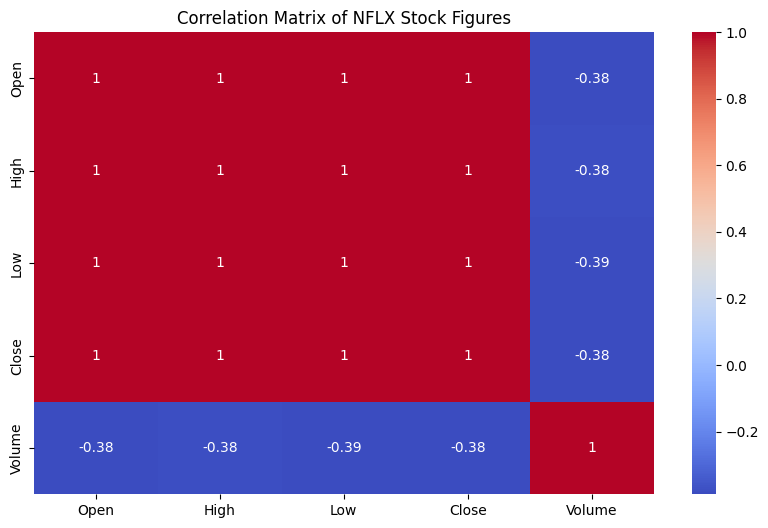

In [86]:
# Corrrelation Matrix
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of NFLX Stock Figures')
plt.show()

In [ ]:
# Select features for predicting 'Close' price
df.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Volume']

In [117]:
features = ['Open', 'High', 'Low', 'Volume']
features_data = df[features].values
target_data = df['Close'].values

print(f"Features shape: {features_data.shape}, Target shape: {target_data.shape}")

Features shape: (2515, 4), Target shape: (2515,)


In [118]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features_data)

print(f"Scaled data shape: {scaled_data.shape}")
print(f"Scaled data range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")

Scaled data shape: (2515, 4)
Scaled data range: [0.00, 1.00]


In [139]:
# Create sequences for LSTM

def create_sequences(data, window_size):
    """
    Create sequences of data for LSTM training.
    
    Args:
        data: numpy array of scaled data
        window_size: number of time steps to look back
    
    Returns:
        X: sequences of features
        y: target values (Adj Close)
    """
    X, y = [], []
    
    for i in range(window_size, len(data)):
        # Use all features as input
        X.append(data[i-window_size:i, :])
        # Target is the Adj Close price (last column)
        y.append(data[i, -1])
    
    return np.array(X), np.array(y)


# Set sequence length (look back 60 days)
window_size = 90
X, y = create_sequences(scaled_data, window_size)

print(f"Input sequences (X) shape: {X.shape}")
print(f"Target values (y) shape: {y.shape}")
print(f"Number of features per timestep: {X.shape[2]}")



Input sequences (X) shape: (2425, 90, 4)
Target values (y) shape: (2425,)
Number of features per timestep: 4


In [140]:
# Split into train test splits

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Training set size: 1940 samples
Test set size: 485 samples

X_train shape: (1940, 90, 4)
y_train shape: (1940,)


In [141]:
# create Pytorch tensor and DataLoader
from torch.utils.data import DataLoader, Dataset

class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")


Number of training batches: 61
Number of test batches: 16


In [142]:
# define gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [143]:
# Define LSTM model

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))
        
        # Take the last output
        out = out[:, -1, :]
        
        # Apply dropout
        out = self.dropout(out)
        
        # Fully connected layer
        out = self.fc(out)
        
        return out

# Model hyperparameters
input_size = 4  # Number of features (Open, High, Low, Close, Volume, Adj Close)
hidden_size = 128  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Predicting Close
dropout = 0.2

# Initialize model
model = LSTM(input_size, hidden_size, num_layers, output_size, dropout).to(device)

print("Model Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


Model Architecture:
LSTM(
  (lstm): LSTM(4, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 200,833
Trainable parameters: 200,833


In [144]:
# define loss function and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(f'Loss function: {criterion}')
print(f'Optimizer: {optimizer}')
print(f'Learning rate: {learning_rate}')

Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
Learning rate: 0.01


In [145]:
# Train the model

num_epochs = 100
train_losses = []
val_losses = []

print(f"Starting training for {num_epochs} epochs: ")

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        # Move data to device
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device).unsqueeze(1)
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_X.size(0)
    
    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device).unsqueeze(1)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            val_loss += loss.item() * batch_X.size(0)
    
    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)
    
   
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

print("-" * 60)
print("Training completed!")


Starting training for 100 epochs: 
Epoch [10/100], Train Loss: 0.001435, Val Loss: 0.000638
Epoch [20/100], Train Loss: 0.001454, Val Loss: 0.000284
Epoch [30/100], Train Loss: 0.001341, Val Loss: 0.000187
Epoch [40/100], Train Loss: 0.001393, Val Loss: 0.000216
Epoch [50/100], Train Loss: 0.001362, Val Loss: 0.000205
Epoch [60/100], Train Loss: 0.001292, Val Loss: 0.000411
Epoch [70/100], Train Loss: 0.001366, Val Loss: 0.000221
Epoch [80/100], Train Loss: 0.001395, Val Loss: 0.000477
Epoch [90/100], Train Loss: 0.001355, Val Loss: 0.000469
Epoch [100/100], Train Loss: 0.001324, Val Loss: 0.000425
------------------------------------------------------------
Training completed!


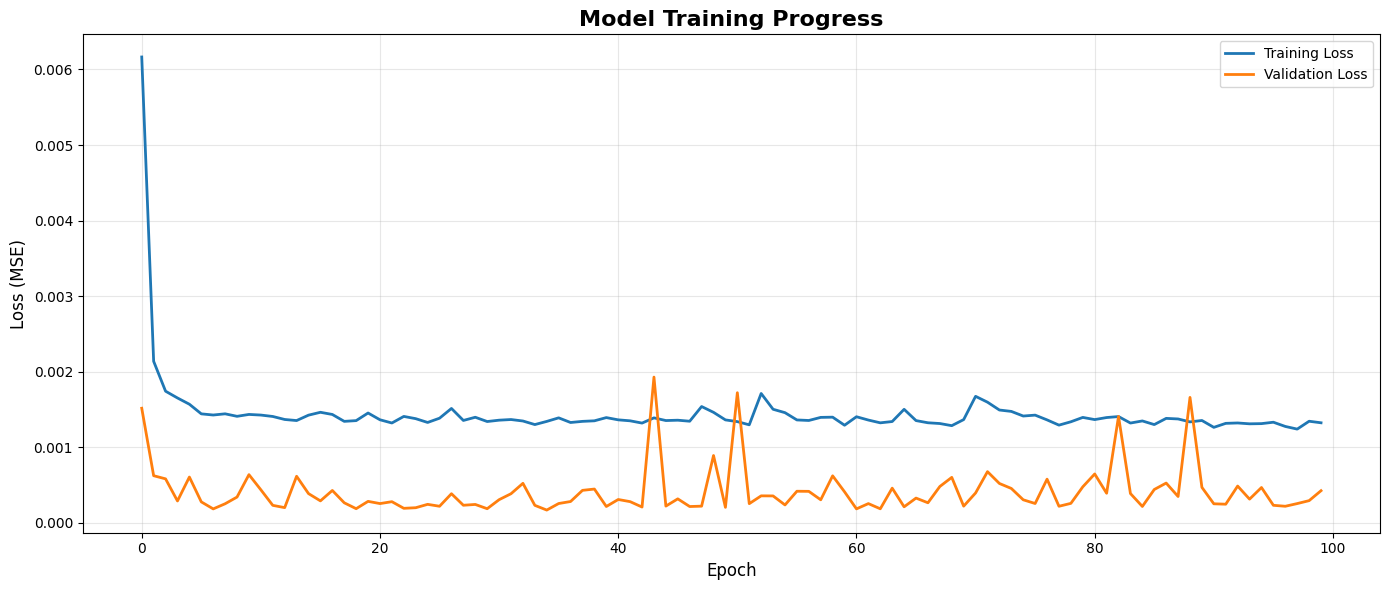

Final Training Loss: 0.001324
Final Validation Loss: 0.000425


In [146]:
# visualize results
plt.figure(figsize=(14, 6))
plt.plot(train_losses, label='Training Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.title('Model Training Progress', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.6f}")
print(f"Final Validation Loss: {val_losses[-1]:.6f}")


In [148]:
# make predictions

model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        outputs = model(batch_X)
        
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(batch_y.cpu().numpy())

predictions = np.array(predictions).flatten()
actuals = np.array(actuals).flatten()

print(f"Predictions shape: {predictions.shape}")
print(f"Actuals shape: {actuals.shape}")

Predictions shape: (485,)
Actuals shape: (485,)


In [150]:
# Denormalize predictions

def denormalize_predictions(scaled_preds, scaler, original_data_shape):
    """
    Denormalize predictions back to original scale.
    """
    # Create dummy array with same shape as original data
    dummy = np.zeros((len(scaled_preds), original_data_shape))
    # Replace the last column (Close) with predictions
    dummy[:, -1] = scaled_preds
    # Inverse transform
    denormalized = scaler.inverse_transform(dummy)
    # Return only the Close column
    return denormalized[:, -1]


# Denormalize
predictions_denorm = denormalize_predictions(predictions, scaler, 4)
actuals_denorm = denormalize_predictions(actuals, scaler, 4)

In [151]:
print(f"Predictions (denormalized) shape: {predictions_denorm.shape}")
print(f"\nFirst 10 Predictions: {predictions_denorm[:10]}")
print(f"First 10 Actuals: {actuals_denorm[:10]}")

Predictions (denormalized) shape: (485,)

First 10 Predictions: [3920217.09420346 4997632.64433108 4172430.36937341 4643358.01592842
 5493955.67003265 4510153.58934551 4098453.74667645 4418743.23025718
 4128063.70745599 3866947.83676416]
First 10 Actuals: [4440599.9372974  2896099.99075672 4060899.87837709 5035300.06740149
 3656000.02054498 2798500.03451621 3617600.03372375 2997699.9815465
 2841599.98187795 1404699.98557994]


In [153]:
# evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(actuals_denorm, predictions_denorm)
mse = mean_squared_error(actuals_denorm, predictions_denorm)
rmse = np.sqrt(mse)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actuals_denorm - predictions_denorm) / actuals_denorm)) * 100


print("MODEL PERFORMANCE METRICS")
print(f"Mean Absolute Error (MAE):     ${mae:.2f}")
print(f"Mean Squared Error (MSE):      ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"Mean Absolute % Error (MAPE):  {mape:.2f}%")


MODEL PERFORMANCE METRICS
Mean Absolute Error (MAE):     $2095213.88
Mean Squared Error (MSE):      $7440329711273.74
Root Mean Squared Error (RMSE): $2727696.78
Mean Absolute % Error (MAPE):  57.91%


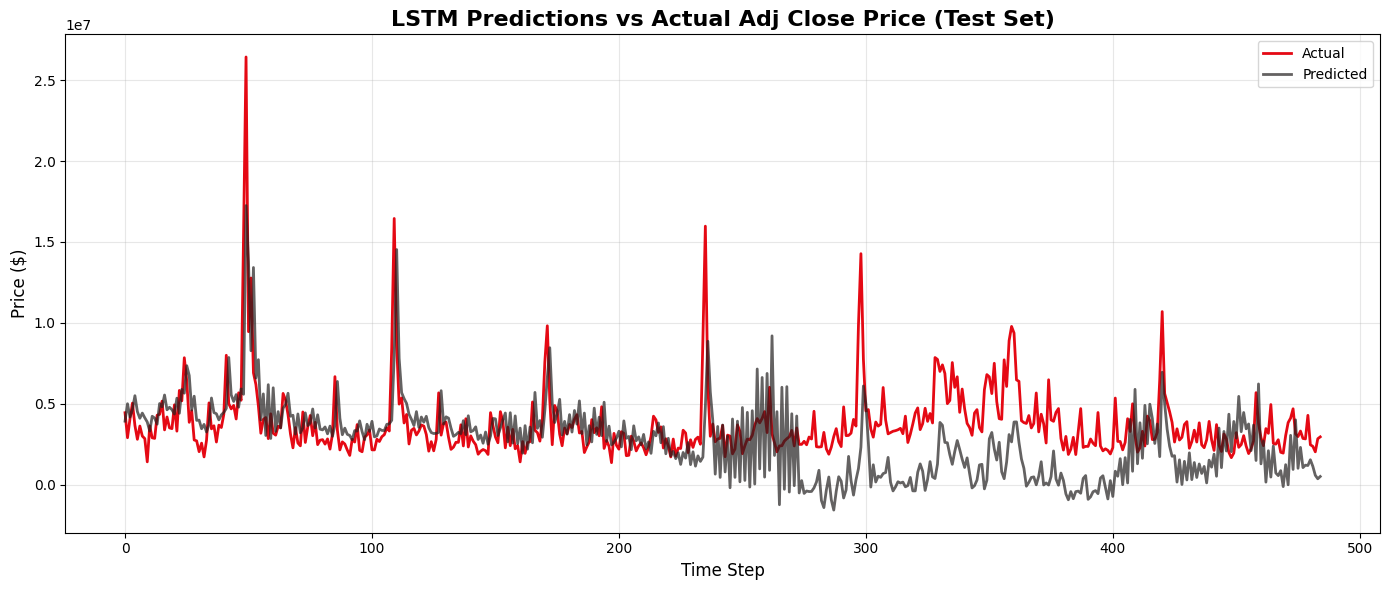

In [156]:
# Plot 1: Predictions vs Actuals (Time Series)
plt.figure(figsize=(14, 6))
plt.plot(actuals_denorm, label='Actual', linewidth=2, color='#e50914')
plt.plot(predictions_denorm, label='Predicted', linewidth=2, alpha=0.7, color='#221f1f')
plt.title('LSTM Predictions vs Actual Adj Close Price (Test Set)', fontsize=16, fontweight='bold')
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




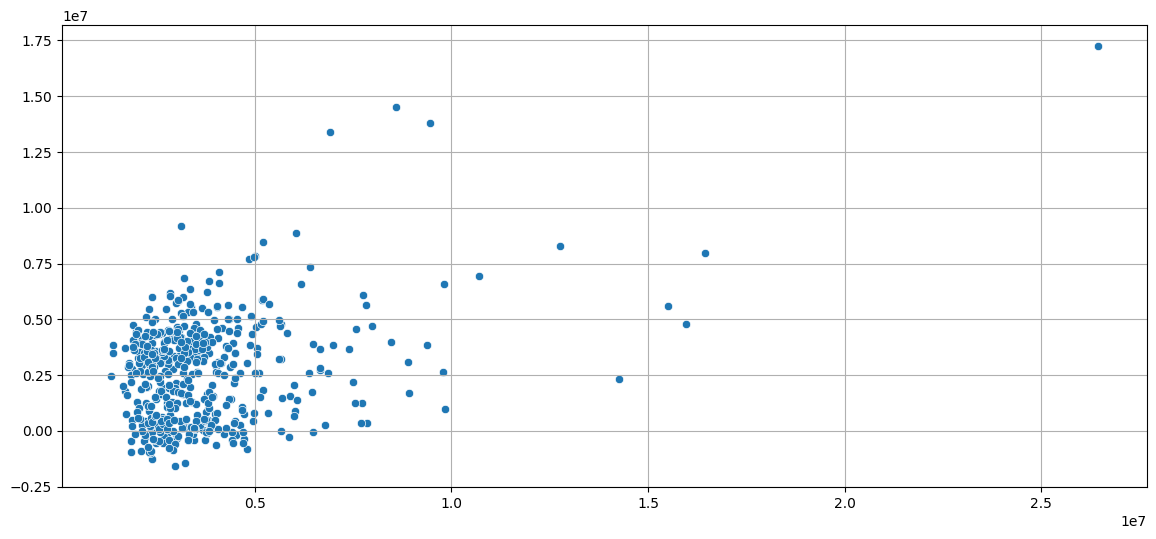

In [158]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=actuals_denorm, y=predictions_denorm)
plt.grid(True)

In [159]:
# predict future prices

def predict_future(model, last_sequence, scaler, features=4, n_days=30):
    """
    Predict future stock prices.
    
    Args:
        model: trained LSTM model
        last_sequence: last sequence from training data
        scaler: fitted scaler
        features: list of feature names
        n_days: number of days to predict
    
    Returns:
        predictions: array of predicted prices
    """
    model.eval()
    predictions = []
    current_sequence = last_sequence.copy()
    
    with torch.no_grad():
        for _ in range(n_days):
            # Prepare input
            X = torch.FloatTensor(current_sequence).unsqueeze(0).to(device)
            
            # Make prediction
            pred = model(X).cpu().numpy()[0, 0]
            predictions.append(pred)
            
            # Update sequence for next prediction
            # Create new row with predicted value
            new_row = current_sequence[-1].copy()
            new_row[-1] = pred  # Update Adj Close with prediction
            
            # Append and remove first row
            current_sequence = np.vstack([current_sequence[1:], new_row])
    
    # Denormalize predictions
    predictions = denormalize_predictions(np.array(predictions), scaler, 4)
    
    return predictions

# Get last sequence from test set
last_sequence = X_test[-1]

# Predict next 30 days
future_predictions = predict_future(model, last_sequence, scaler, features, n_days=30)

print(f"Predicted prices for next 30 days:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ${price:.2f}")


Predicted prices for next 30 days:
Day 1: $498711.34
Day 2: $-294597.56
Day 3: $-1349560.30
Day 4: $-1772754.55
Day 5: $-2658424.62
Day 6: $-2633836.68
Day 7: $-3580716.96
Day 8: $-3157622.23
Day 9: $-4202974.44
Day 10: $-3296865.50
Day 11: $-4513916.47
Day 12: $-3040069.15
Day 13: $-4703224.34
Day 14: $-1079356.11
Day 15: $-2663649.61
Day 16: $2817785.50
Day 17: $-1660356.51
Day 18: $2671015.59
Day 19: $-612869.17
Day 20: $-1221074.43
Day 21: $2602541.82
Day 22: $-277228.85
Day 23: $82250.57
Day 24: $978987.43
Day 25: $-220807.16
Day 26: $6681933.66
Day 27: $1612984.65
Day 28: $6079419.44
Day 29: $1107165.39
Day 30: $3932259.81


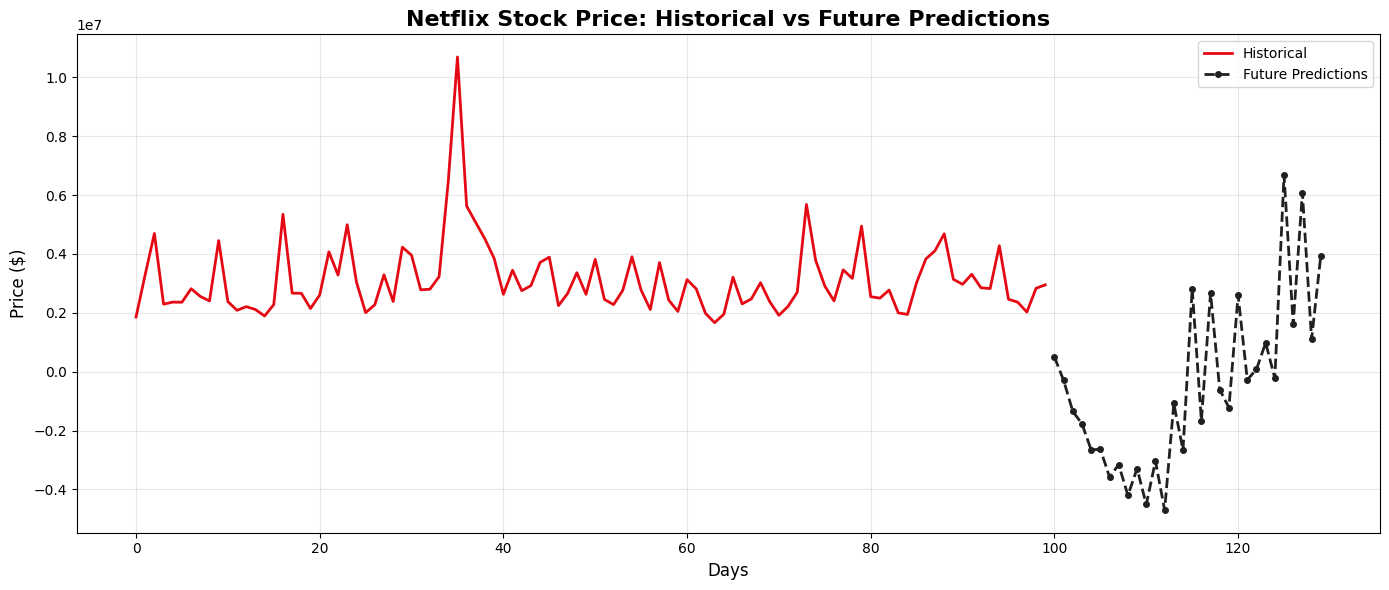

In [160]:
# Visualize future predictions
plt.figure(figsize=(14, 6))

# Plot historical data (last 100 days of test set)
historical_days = 100
historical_prices = actuals_denorm[-historical_days:]
historical_indices = range(len(historical_prices))

plt.plot(historical_indices, historical_prices, label='Historical', linewidth=2, color='#e50914')

# Plot predictions
prediction_indices = range(len(historical_prices), len(historical_prices) + len(future_predictions))
plt.plot(prediction_indices, future_predictions, label='Future Predictions', linewidth=2, 
         linestyle='--', color='#221f1f', marker='o', markersize=4)

plt.title('Netflix Stock Price: Historical vs Future Predictions', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [161]:
# save the model
torch.save(model.state_dict(), 'nflx.pth')